<a href="https://colab.research.google.com/github/rks16/My_project/blob/main/Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement:
 To build a predictive model that estimates the number of Calories burned by an individual based on various features such as gender, heart rate, height, weight, body temperature, and duration of the workout

In [383]:
#importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error, mean_squared_error,r2_score

# Data Collection and Processing




Here the there are to csv files namely 'calories' and 'exercise'.
* The first file contains datas of how much calories is burnt by an individual and is mapped to his/her unique user_id.
* The second file contains datas such as the person's Gender, Age, Height,Weight, Duration,	Heart Rate,	Body Temp.

## Loading into DataFrame

In [384]:
#loading data 'calorie' to a pandas Dataframe
calories = pd.read_csv("/content/calories.csv")

In [385]:
# preview
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [386]:
#loading 'exercise' data to a pandas Dataframe
exercise = pd.read_csv("/content/exercise.csv")

In [387]:
# preview
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Combining 2 dataframes

In [388]:
# Combining 2 dataframes

exercise = exercise.drop("User_ID",axis =1)

calories_data = pd.concat([exercise, calories["Calories"]], axis=1)

In [389]:
# Preview of the new dataframe

calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [390]:
# Total number of data in the new dataset
calories_data.shape # output implies ( rows,columns )

(15000, 8)

In [391]:
# Getting information about the data

calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


There is no null values in the data which makes data processing Easy

# Data Analysis and Visualization

In [392]:
# Analyzing different statistical parameters in the dataset

calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [393]:
# Analyzing data values

calories_data["Gender"].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

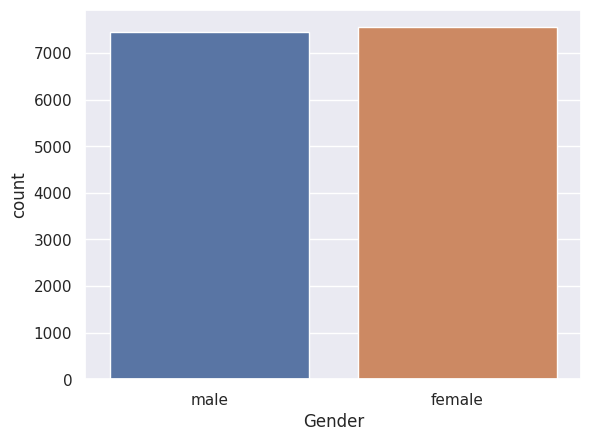

In [394]:
# Visualizing Data
sns.countplot(data= calories_data, x="Gender")

From the above graph we come to know that the ratio of male and female in the dataset is at par ie.somewhat equal. which is essential in trainning our ML model and giving accurate results

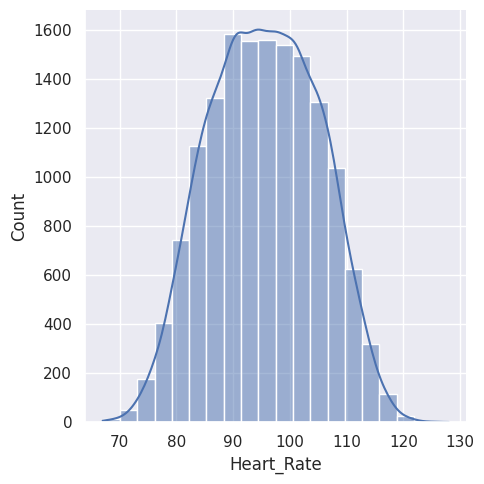

In [395]:
sns.displot(calories_data['Heart_Rate'], kde=True,bins=20)

<Axes: xlabel='Age', ylabel='Count'>

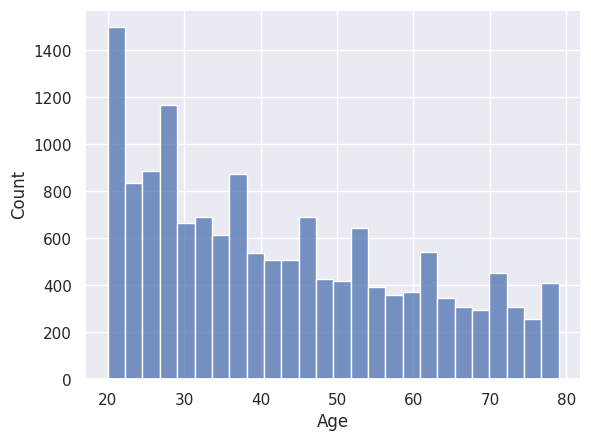

In [396]:
# Analysing the distribution of "Age" in the dataset
sns.histplot(calories_data["Age"])

<ipython-input-397-0b3bf9edaf59>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data["Height"])


<Axes: xlabel='Height', ylabel='Density'>

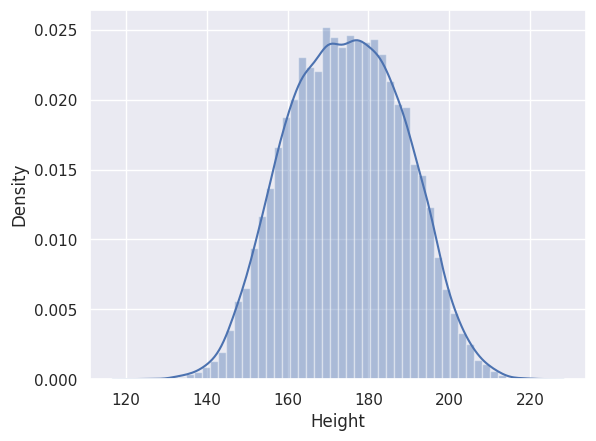

In [397]:
# Analysing the distribution of "Height" in the dataset
sns.distplot(calories_data["Height"])

<ipython-input-398-8ee0d9da4b72>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories_data["Weight"], )


<Axes: xlabel='Weight', ylabel='Density'>

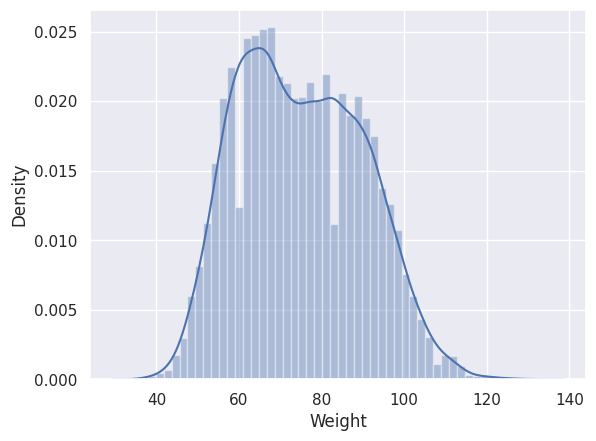

In [398]:
# Analysing the distribution of "Weight" in the dataset
sns.distplot(calories_data["Weight"], )

<Axes: xlabel='Duration', ylabel='Calories'>

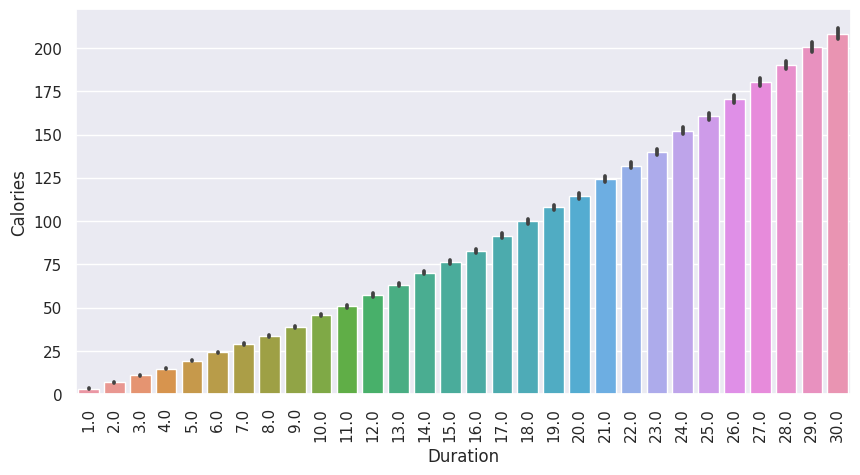

In [399]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(calories_data,x= calories_data["Duration"],y="Calories")

We infer that as the duration of workout increase the amount of calorie burn also increases

In [400]:
# Finding different corelation of the data

correlation = calories_data.corr()

<ipython-input-400-c9458abe92a2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = calories_data.corr()


<Axes: xlabel='Age', ylabel='Calories'>

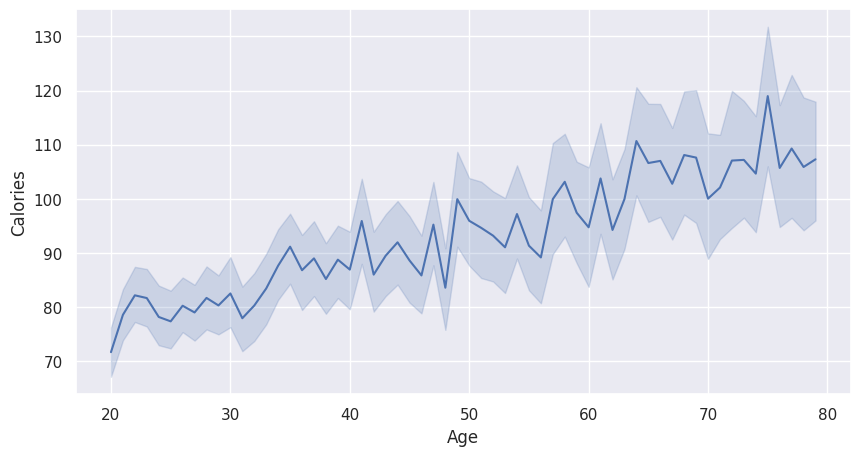

In [401]:
plt.figure(figsize=(10,5))
sns.lineplot(calories_data,x= calories_data["Age"],y="Calories")

<Axes: >

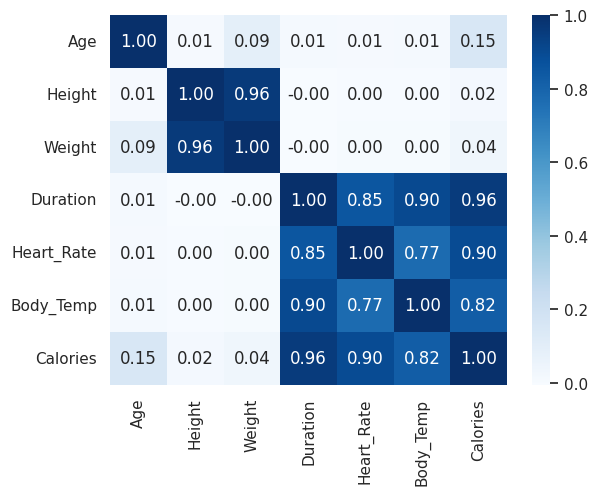

In [421]:
sns.heatmap(correlation, cbar=True, fmt=".2f", annot=True, cmap="Blues")

Important Insights from the heatmap:
    
  1. Age,Height,Weight doesnt play a siginificant role in determing the calories burnt.

  2. Duration of Workout:

 >* Duration of Workout is positively correlated to Heart_Rate
      * ie.Higer the duration of workout heart beats more faster
* Duration of Workout is positively correlated to Calories burnt
      * ie.Higer the duration of workout more Calories will be burnt
* Duration of Workout is positively correlated to Body_temp
      * ie.Higer the duration of workout the body temperature increses

3. Hear_rate:
 >* Heart Rate is positively correlated with Body temperature
    * ie. As Heart Rate increases the body temperature also increses
  * Heart Rate is positively correlated with Calories burnt
    * ie. As Heart Rate increases the amount of calories burnt also increases
  




---
Now again, to feed our data to the ML model, the values/parameters in the
data must be of the same dtype so that our model could learn from the data and give us accurate results
  * Here the "Gender" col data is in string format which we must change into a similar dtype.
   * For this let us represent 'Male' as '0' and 'Female' as '1'

In [403]:
calories_data.replace({"Gender":{"male": 0, "female": 1}},inplace=True )

In [404]:
# Preview after change
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Seperating features and labels

In [405]:
X = calories_data.drop(columns=["Calories"], axis=1)
Y = calories_data["Calories"]

#shape of these data
print(X.shape," ",Y.shape)

(15000, 7)   (15000,)


In [406]:
#features column
print(X)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [407]:
#label columns
print(Y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


# Splitting data into trainning and test data

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

In [409]:
# Analyzing the number of data points in each varible

print("Shape of trainng data is : ", X_train.shape, "\nShape of test data is : ",X_test.shape)

Shape of trainng data is :  (12000, 7) 
Shape of test data is :  (3000, 7)


# Model Trainnig

##  1.Linear Regression

In [410]:
#Using Linear Regression

model_lr = LinearRegression()

#fitting data
model_lr.fit(X_train,y_train)

LinearRegression()

In [411]:
#Evaluating Model

test_data_p = model_lr.predict(X_test)

In [412]:
# Finding mean absolute error
mae = mean_absolute_error(y_test,test_data_p)

# Finding mean absolute percentage error
mape = mean_absolute_percentage_error(y_test,test_data_p)

# Finding mean squared error
mse = mean_squared_error(y_test,test_data_p)

# Finding Root mean squared error
rsme = np.sqrt(mean_squared_error(y_test,test_data_p))

#Finding R2 score
r2_sc = r2_score(y_test,test_data_p)

print("Mean Absolute Error            : ", mae)
print("Mean Absolute Percentage Error : ", mape,"%")
print("Mean Squared Error             : ", mse)
print("Root Mean Squared Error        : ", rsme)
print("R2 Score                       : ",r2_sc)


Mean Absolute Error            :  8.511171288363476
Mean Absolute Percentage Error :  0.3057720319192161 %
Mean Squared Error             :  131.83012681228652
Root Mean Squared Error        :  11.481730131486566
R2 Score                       :  0.9662136982654852


##2.Random Forest Regressor

In [413]:
#Using Random Forest Regressor

model_rf = RandomForestRegressor()


#fitting data
model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [414]:
#Evaluating Model

test_data_p = model_rf.predict(X_test)

Comparing error values with trainng data, Using mean absolute error (MAE) ,mean absolute percentage error(MAPE) , mean squared error (MSE) , root mean squared error (RSME), R square coefficient error (R2 score)

In [415]:
# Finding mean absolute error
mae = mean_absolute_error(y_test,test_data_p)

# Finding mean absolute percentage error
mape = mean_absolute_percentage_error(y_test,test_data_p)

# Finding mean squared error
mse = mean_squared_error(y_test,test_data_p)

# Finding Root mean squared error
rsme = np.sqrt(mean_squared_error(y_test,test_data_p))

#Finding R2 score
r2_sc = r2_score(y_test,test_data_p)

print("Mean Absolute Error            : ", mae)
print("Mean Absolute Percentage Error : ", mape,"%")
print("Mean Squared Error             : ", mse)
print("Root Mean Squared Error        : ", rsme)
print("R2 Score                       : ",r2_sc)


Mean Absolute Error            :  1.7552333333333336
Mean Absolute Percentage Error :  0.028226440132992157 %
Mean Squared Error             :  7.879804
Root Mean Squared Error        :  2.807098858252057
R2 Score                       :  0.9979805114203377


 ## 3.XGBoost Regressor



In [416]:
#Using XGBRegressor

model_xgb = XGBRegressor()

#fitting data
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [417]:
#Evaluating Model

test_data_p = model_xgb.predict(X_test)

Comparing error values with trainng data, Using mean absolute error (MAE) ,mean absolute percentage error(MAPE) , mean squared error (MSE) , root mean squared error (RSME), R square coefficient error (R2 score)

In [418]:
# Finding mean absolute error
mae = mean_absolute_error(y_test,test_data_p)

# Finding mean absolute percentage error
mape = mean_absolute_percentage_error(y_test,test_data_p)

# Finding mean squared error
mse = mean_squared_error(y_test,test_data_p)

# Finding Root mean squared error
rsme = np.sqrt(mean_squared_error(y_test,test_data_p))

#Finding R2 score
r2_sc = r2_score(y_test,test_data_p)

print("Mean Absolute Error            : ", mae)
print("Mean Absolute Percentage Error : ", mape,"%")
print("Mean Squared Error             : ", mse)
print("Root Mean Squared Error        : ", rsme)
print("R2 Score                       : ",r2_sc)


Mean Absolute Error            :  1.4838132636447747
Mean Absolute Percentage Error :  0.02839931217106161 %
Mean Squared Error             :  4.538403649405354
Root Mean Squared Error        :  2.130352940102967
R2 Score                       :  0.9988368677266755


From the above results we can conclude that XGBRegressor is the most accurate model among the rest and hence we select it for our model



---



---



# Predicting the Calories burnt

In [419]:
# Test Data 1

data =[0,	68,	190.0,	94.0,	29.0,	105.0,	40.8]

numpy_array= np.asarray(data)

#reshaping the array
reshaped = numpy_array.reshape(1,7)

predict = model.predict(reshaped)

print("The Calorie burnt for the given data is ", predict)


The Calorie burnt for the given data is  [232.93199]


In [420]:
# Test Data 2

data2 = [1,68,157.0,57.0,13.0,92.0,40.1]

numpy_array= np.asarray(data2)

#reshaping the array
reshaped = numpy_array.reshape(1,7)

predict = model.predict(reshaped)

print("The Calorie burnt for the given data is ", predict)

The Calorie burnt for the given data is  [70.659706]
